In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.9 MB/s eta 0:00:00


#**Exploratory Data Analysis**

In [2]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
import ast

In [3]:
#Loading the data and assigning it to a variable
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#cleaning the data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

data_jobs.csv:   0%|          | 0.00/231M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/785741 [00:00<?, ? examples/s]

In [4]:
#Filter for US Data Analyst Roles
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

In [5]:
#Basic Statistics of the Data

Mean_Salary = df_DA_US['salary_year_avg'].mean()
Median_Salary = df_DA_US['salary_year_avg'].median()
Min_Salary = df_DA_US['salary_year_avg'].min()
Max_Salary = df_DA_US['salary_year_avg'].max()
first_Quartile = df_DA_US['salary_year_avg'].quantile(0.25)
third_Quartile = df_DA_US['salary_year_avg'].quantile(0.75)
Std_dev = df_DA_US['salary_year_avg'].std()

print(f'Mean Salary = {Mean_Salary}')
print(f'Median Salary = {Median_Salary}')
print(f'Min Salary = {Min_Salary}')
print(f'Max Salary = {Max_Salary}')
print(f'1st Quartile = {first_Quartile}')
print(f'3rd Quartile = {third_Quartile}')
print(f'Standard Deviation = {Std_dev}')

Mean Salary = 94553.96492367098
Median Salary = 90000.0
Min Salary = 25000.0
Max Salary = 375000.0
1st Quartile = 71262.5
3rd Quartile = 112500.0
Standard Deviation = 33248.65065543985


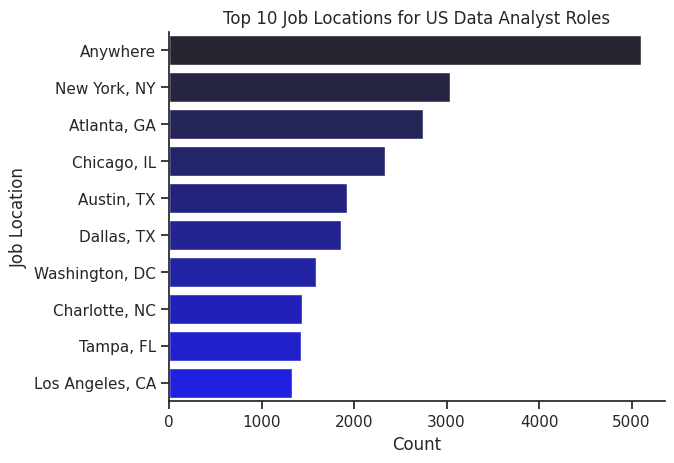

In [6]:
#The top 10 job locations along with its count and we can convert it into a dataframe using to_frame(), plotting it.

df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style = 'ticks')
a = sns.barplot(df_plot, x = 'count', y = 'job_location', hue = 'job_location', palette= 'dark:blue')
a.set_title('Top 10 Job Locations for US Data Analyst Roles')
a.set_xlabel('Count')
a.set_ylabel('Job Location')
sns.despine() #removes the border around the plot
plt.show()


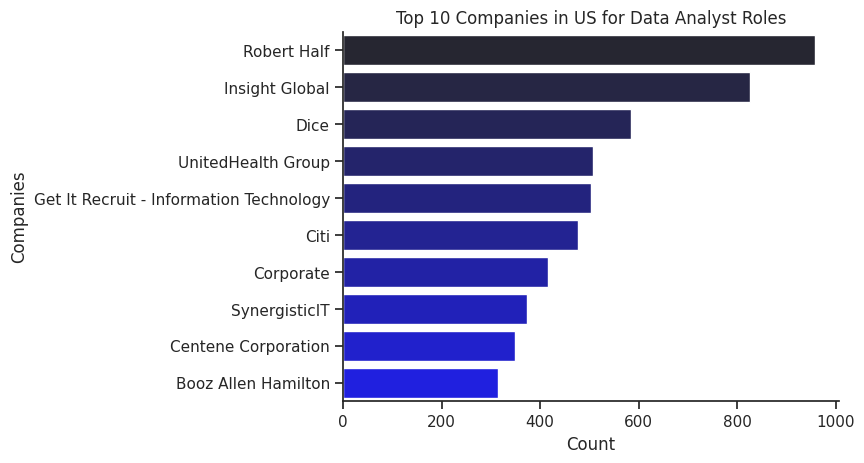

In [7]:
#The top 10 companies for Data Analysts

df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style = 'ticks')
a = sns.barplot(df_plot, x = 'count', y = 'company_name', hue = 'company_name', palette= 'dark:blue')
a.set_title('Top 10 Companies in US for Data Analyst Roles')
a.set_xlabel('Count')
a.set_ylabel('Companies')
sns.despine() #removes the border around the plot
plt.show()

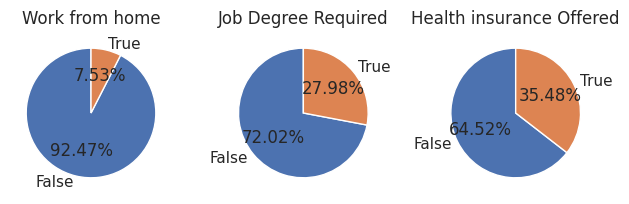

In [8]:
#subplots and pie plots

fig, ax = plt.subplots(1,3)

dict_column = {
                  'job_work_from_home': 'Work from home',
                  'job_no_degree_mention': 'Job Degree Required',
                  'job_health_insurance': 'Health insurance Offered'
              }

#column is the 'job_work_from_home, and title (the title of that column) is "Work from home".
#(column, title) is a tuple. should be used as we created a dictionary
#we have to manually enter the labels list, we have carefully check it

for i, (column, title) in enumerate(dict_column.items()):
  ax[i].pie(df_DA_US[column].value_counts(), startangle = 90, autopct = '%1.2f%%', labels = ['False', 'True'])
  ax[i].set_title(title)

plt.tight_layout()
plt.show()


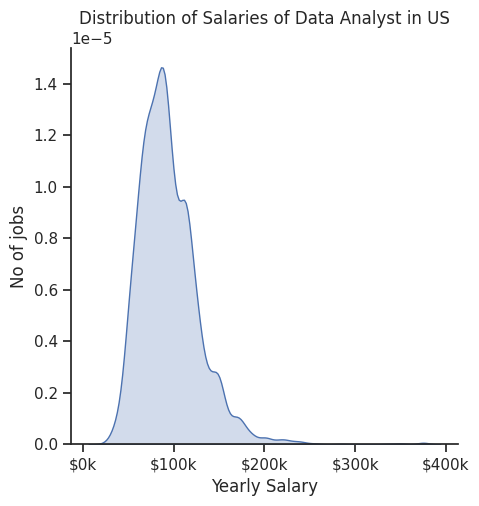

In [9]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill = True)
plt.title('Distribution of Salaries of Data Analyst in US')
plt.xlabel('Yearly Salary')
plt.ylabel('No of jobs')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))